<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Capstone Project:
### FeelFlow AI: Decoding Emotions, Advancing Patient Support

---

### **Background**

In Singapore, the urgency to address mental health issues among younger generations, particularly GenZ and millennials, is critical due to increasing pressures from work, school, and personal relationships leading to anxiety, depression, and substance abuse. Recognizing this, the Ministry of Health and AI Singapore (NUS) have initiated the "Mental Health with AI" Seminar to integrate AI technologies with clinical practices, enhancing therapeutic processes.

The aims of this study is to develop a real-time emotion predictor app. The objective is to alleviate the layer of assessing patients' emotional well-being, which is crucial in enabling a more accurate diagnosis and treatment from. The app is in its beta stages, but seeks to be presented at the seminar for. Further discussions to adoption and integration into pre-existing app/softwares can be opened during this seminar. 

### **Problem Statement**
##### *Where discerning people’s emotion can sometimes be an unnerving guessing game. How can clinicians use speech emotion recognition technology to accurately assess patients' emotional well-being, thereby improving diagnosis and treatment outcomes?*

### **Table of Contents**

### 3. [Exploratory Data Analysis](#exploratory-data-analysis)
   #### 3.1 [General Insights](#general-insights)
   #### 3.1.1 [Distribution Count of the Emotion in the Combined Dataset](#distribution-count)
   #### 3.1.2 [Effects of Ethnicity](#effects-of-ethnicity)
   #### 3.2 [Effects of Augmentation](#effects-of-augmentation)
   #### 3.2.1 [Types of Emotion](#types-of-emotion)
   ##### 3.2.1.1 [Angry](#angry)
   ##### 3.2.1.2 [Disgust](#disgust)
   ##### 3.2.1.3 [Fear](#fear)
   ##### 3.2.1.4 [Happy](#happy)
   ##### 3.2.1.5 [Neutral](#neutral)
   ##### 3.2.1.6 [Sad](#sad)
   #### 3.2.2 [Types of Augmentation](#types-of-augmentation)
   #### 3.3 [Feature Analysis](#feature-analysis)
   #### 3.3.1 [Distribution Across Transformations](#distribution-across-transformations)
   #### 3.3.2 [Correlation Analysis](#correlation-analysis)

## **3. Exploratory Data Analysis**<a id='exploratory-data-analysis'></a>

##### *Note: It is advisable to run this notebook on Python 3.8.19 or earlier.*

### Importing Libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# setting displays
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../csv/combined_aug_features.csv')

In [3]:
data.head()

ZCR_1_original  ZCR_1_noisy  ZCR_1_stretched  ZCR_1_pitched  Chroma_1_original  Chroma_1_noisy  Chroma_1_stretched  Chroma_1_pitched  Chroma_2_original  Chroma_2_noisy  Chroma_2_stretched  Chroma_2_pitched  Chroma_3_original  Chroma_3_noisy  Chroma_3_stretched  Chroma_3_pitched  Chroma_4_original  Chroma_4_noisy  Chroma_4_stretched  Chroma_4_pitched  Chroma_5_original  Chroma_5_noisy  Chroma_5_stretched  Chroma_5_pitched  Chroma_6_original  Chroma_6_noisy  Chroma_6_stretched  Chroma_6_pitched  Chroma_7_original  Chroma_7_noisy  Chroma_7_stretched  Chroma_7_pitched  Chroma_8_original  Chroma_8_noisy  Chroma_8_stretched  Chroma_8_pitched  Chroma_9_original  Chroma_9_noisy  Chroma_9_stretched  Chroma_9_pitched  Chroma_10_original  Chroma_10_noisy  Chroma_10_stretched  Chroma_10_pitched  Chroma_11_original  Chroma_11_noisy  Chroma_11_stretched  Chroma_11_pitched  Chroma_12_original  Chroma_12_noisy  Chroma_12_stretched  Chroma_12_pitched  MFCC_1_original  MFCC_1_noisy  MFCC_1_stretched  MFCC_1_pitched  MFCC_2_original  MFCC_2_noisy  MFCC_2_stretched  MFCC_2_pitched  MFCC_3_original  MFCC_3_noisy  MFCC_3_stretched  MFCC_3_pitched  MFCC_4_original  MFCC_4_noisy  MFCC_4_stretched  MFCC_4_pitched  MFCC_5_original  MFCC_5_noisy  MFCC_5_stretched  MFCC_5_pitched  MFCC_6_original  MFCC_6_noisy  MFCC_6_stretched  MFCC_6_pitched  MFCC_7_original  MFCC_7_noisy  MFCC_7_stretched  MFCC_7_pitched  MFCC_8_original  MFCC_8_noisy  MFCC_8_stretched  MFCC_8_pitched  MFCC_9_original  MFCC_9_noisy  MFCC_9_stretched  MFCC_9_pitched  MFCC_10_original  MFCC_10_noisy  MFCC_10_stretched  MFCC_10_pitched  MFCC_11_original  MFCC_11_noisy  MFCC_11_stretched  MFCC_11_pitched  MFCC_12_original  MFCC_12_noisy  MFCC_12_stretched  MFCC_12_pitched  MFCC_13_original  MFCC_13_noisy  MFCC_13_stretched  MFCC_13_pitched  MFCC_14_original  MFCC_14_noisy  MFCC_14_stretched  MFCC_14_pitched  MFCC_15_original  MFCC_15_noisy  MFCC_15_stretched  MFCC_15_pitched  MFCC_16_original  MFCC_16_noisy  MFCC_16_stretched  MFCC_16_pitched  MFCC_17_original  MFCC_17_noisy  MFCC_17_stretched  MFCC_17_pitched  MFCC_18_original  MFCC_18_noisy  MFCC_18_stretched  MFCC_18_pitched  MFCC_19_original  MFCC_19_noisy  MFCC_19_stretched  MFCC_19_pitched  MFCC_20_original  MFCC_20_noisy  MFCC_20_stretched  MFCC_20_pitched  RMS_1_original  RMS_1_noisy  RMS_1_stretched  RMS_1_pitched  Spectral_Contrast_1_original  Spectral_Contrast_1_noisy  Spectral_Contrast_1_stretched  Spectral_Contrast_1_pitched  Spectral_Contrast_2_original  Spectral_Contrast_2_noisy  Spectral_Contrast_2_stretched  Spectral_Contrast_2_pitched  Spectral_Contrast_3_original  Spectral_Contrast_3_noisy  Spectral_Contrast_3_stretched  Spectral_Contrast_3_pitched  Spectral_Contrast_4_original  Spectral_Contrast_4_noisy  Spectral_Contrast_4_stretched  Spectral_Contrast_4_pitched  Spectral_Contrast_5_original  Spectral_Contrast_5_noisy  Spectral_Contrast_5_stretched  Spectral_Contrast_5_pitched  Spectral_Contrast_6_original  Spectral_Contrast_6_noisy  Spectral_Contrast_6_stretched  Spectral_Contrast_6_pitched  Spectral_Contrast_7_original  Spectral_Contrast_7_noisy  Spectral_Contrast_7_stretched  Spectral_Contrast_7_pitched  Label
0        0.058203     0.168413         0.140260       0.222031           0.205495        0.329408            0.406689          0.287099           0.210801        0.316133            0.433047          0.375443           0.340381     -258.840973          128.785324          7.942098          38.538311      -35.239319           29.168425        -11.469213           8.415143      -11.156569            3.608841         -9.270546         -14.460870       -1.005800          -11.297530         10.187161          -1.729180        8.248435           -8.969141          4.759172           1.231810        0.075086           13.650274         15.361275          21.815267       22.886835           18.335395         18.495920           66.329174         0.164737             0.191109           0.233837            0.284654     

In [4]:
print(data.shape)

(43242, 165)


### **3.1 General Insights**<a id='general-insights'></a>

We look at the overall distribution of the train dataset, to check if there are imbalanced classes.

#### **3.1.1 Distribution Count of the Emotion in the Combined Dataset**<a id='distribution-count'></a>

/var/folders/xf/6pcnsx5j1l71l59h1l_f56rr0000gn/T/ipykernel_51868/3467567569.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x='Emotions', palette=palette, order=valid_emotions)


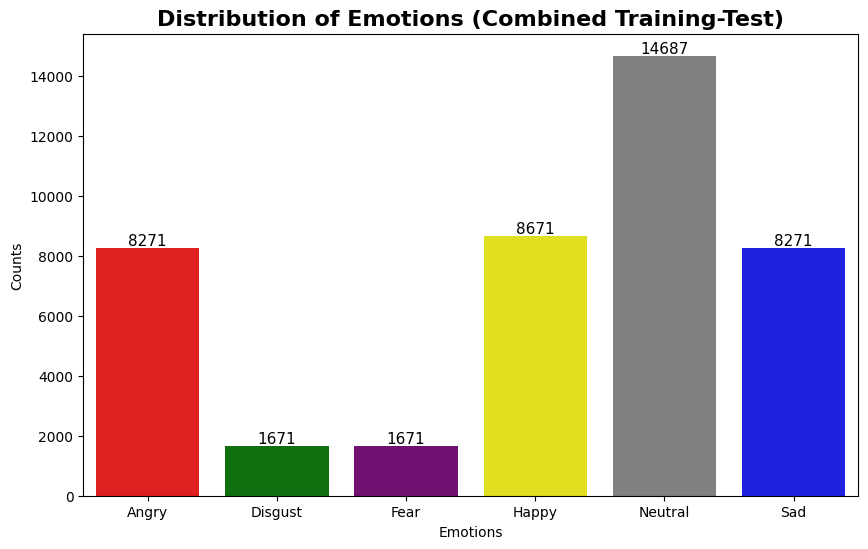

In [5]:
# Load the dataset from CSV with a specified encoding
combined_df = pd.read_csv('../csv/Combined_Dataset.csv', encoding='ISO-8859-1')

# Define valid emotions according to the encoding mapping
label_mapping = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad'}
valid_emotions = list(label_mapping.values())  # This maintains the order as specified in your encoding

# Remove any rows where 'Emotions' is not a valid category
combined_df = combined_df[combined_df['Emotions'].isin(valid_emotions)]

# Define a color palette for the emotions
palette = {
    'Angry': 'red',
    'Happy': 'yellow',
    'Sad': 'blue',
    'Neutral': 'gray',
    'Fear': 'purple',
    'Disgust': 'green'
}

# Plot the distribution of emotions in the dataset
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='Emotions', palette=palette, order=valid_emotions)
plt.title('Distribution of Emotions (Combined Training-Test)', fontsize=16, fontweight='bold')  # Increase font size and bold the title
plt.xlabel('Emotions')
plt.ylabel('Counts')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

##### Analysis of the Graph

The graph depicts the distribution of emotions in your dataset with a clear imbalance:

* Neutral and Angry are the most frequent emotions, with counts close to 14,687 and 8,271, respectively.
* Happy and Sad show moderate frequencies, each close to 8,671 and 8,271.
* Fear and Disgust are substantially underrepresented in comparison, each with a count of 1,671.

##### Justification for Not Balancing Dataset
Balancing the dataset can be done by oversampling the minority classes, and/or undersampling the majority classes. However, we will not be balancing the dataset for the following reasons:

1) Preservation of Natural Distribution:
    * Reflect Real-World Scenarios: The natural distribution of emotions in your dataset likely reflects real-world scenarios where some emotions are more prevalent than others. Maintaining this distribution ensures that your model's predictions mirror actual emotional occurrences and their frequencies.
    * Avoid Bias: Modifying the dataset through oversampling or undersampling can introduce biases. For instance, oversampling minority classes might make the model overly sensitive to less common emotions, leading to higher false positive rates for these emotions. Conversely, undersampling major classes might cause the model to underpredict these emotions.

2) Risk of Overfitting:
    * Oversampling: Repeatedly using the same instances to oversample minority classes can lead the model to memorize these instances rather than generalize from them, resulting in poor performance on unseen data.
    * Underfitting Major Classes: Reducing the number of samples in predominant classes might lead to underfitting, where the model fails to capture the complexity and variability of these emotions.

3) Model Evaluation and Performance:
    * Realistic Performance Metrics: By training the model on the unmodified dataset, the performance metrics you obtain (such as accuracy, precision, recall) will more accurately reflect how the model will perform in practical applications.
    * Complexity of Emotions: Emotional data often contain subtle nuances. The model needs exposure to a wide and unaltered range of examples to learn these effectively.

4) Ethical Considerations:
    * Fairness: Altering the class distribution might inadvertently prioritize some emotions over others, which could be ethically questionable, especially if the model's outputs have significant consequences (e.g., in mental health assessments).

#### **3.1.2 Effects of Ethnicity**<a id='effects-of-ethnicity'></a>

The analysis of the effects of accents is bonus, and not contributory to our study on emotions. Since we have the CREMA data which has a variety of ethnic speakers, we thought that a visualisation of how race/ethnicity could be interesting to how the voice actors speak, all else remain ceteris paribus - the text of speech, emotion, time taken to speak etc. Just note that this is not indicative of accents, as that would be an assumption that needs to be studied further.

The choice of emotion here is "Neutral", which typically means the intonation and energy levels in the voice should be relatively flat and stable compared to more expressive emotions like "Happy" or "Angry".

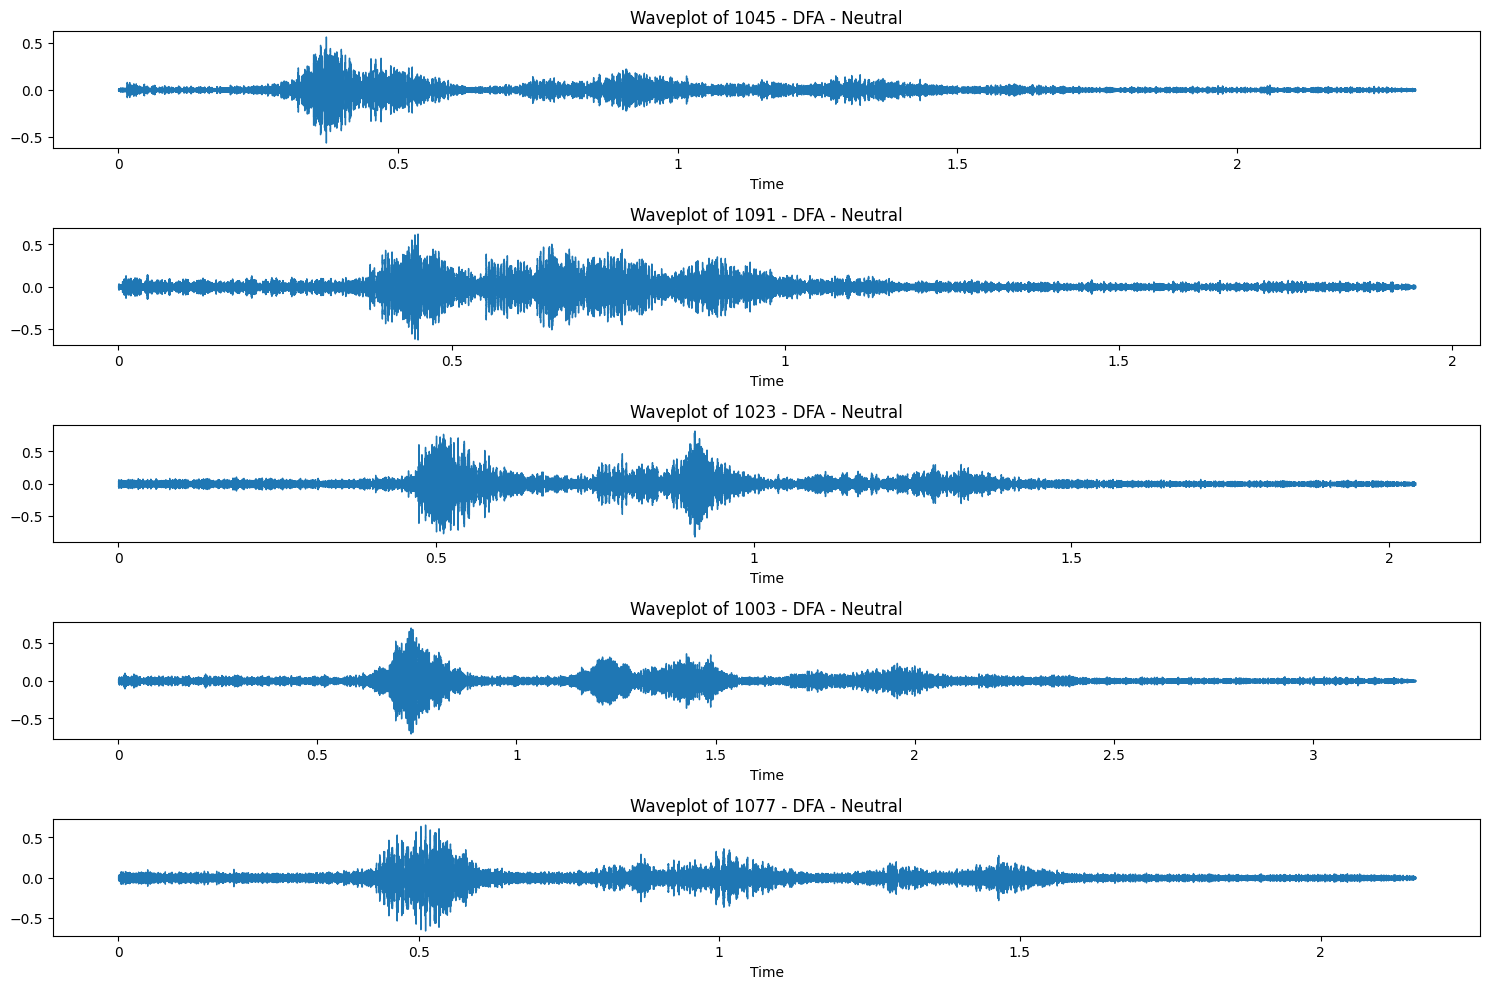

In [6]:
# DataFrame with the correct paths, assuming files exist in the specified directory
data = {
    'Path': ['aug_1045_DFA_NEU_XX.wav', 'aug_1091_DFA_NEU_XX.wav', 'aug_1023_DFA_NEU_XX.wav', 
             'aug_1003_DFA_NEU_XX.wav', 'aug_1077_DFA_NEU_XX.wav'],
    'Emotions': ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral']
}
crema_df = pd.DataFrame(data)

# Specifying identifiers for race
identifiers = ['1045', '1091', '1023', '1003', '1077']
emotion = 'Neutral'
speech_mentioned = 'DFA'

def display_waveplot_for_accents(df, identifiers, emotion, speech_mentioned):
    plt.figure(figsize=(15, 10))
    for i, id in enumerate(identifiers):
        files = df[(df['Path'].str.contains(id)) & (df['Emotions'].str.lower() == emotion.lower()) &
                   (df['Path'].str.contains(speech_mentioned))]
        if len(files) > 0:
            # Update the base path to the correct one
            file_path = os.path.join('../dataset/CREMA_aug', files['Path'].values[0])
            if os.path.exists(file_path):
                audio, sr = librosa.load(file_path, sr=None)
                plt.subplot(len(identifiers), 1, i + 1)
                librosa.display.waveshow(audio, sr=sr)
                plt.title(f'Waveplot of {id} - {speech_mentioned} - {emotion}')
            else:
                print(f"File does not exist: {file_path}")
        else:
            print(f"No files found for ID {id} with {speech_mentioned} in {emotion}")
    plt.tight_layout()
    plt.show()

# Execute the function to display waveplots
display_waveplot_for_accents(crema_df, identifiers, emotion, speech_mentioned)

#### Interpretation

* 1045 - DFA - Neutral
    - This waveform shows moderate variability in amplitude throughout the recording, with a particularly noticeable peak around the middle. This could represent a point of slight emphasis or a natural fluctuation in speech even within a neutral tone.
* 1091 - DFA - Neutral
    - The waveform exhibits a consistent and flat amplitude for the most part, which is indicative of a very calm and steady speech pattern. The slight rises and falls are typical of normal speech but maintain a neutral tone.
* 1023 - DFA - Neutral
    - Similar to the first waveform, there's a significant peak in the middle, suggesting a moment of emphasis or a change in speech dynamics. It's still within the neutral range but shows that even neutral speech can have moments of slight intensity.
* 1003 - DFA - Neutral
    - This waveform has an interesting structure with two clear peaks, suggesting moments of slightly higher emphasis or changes in the speaker's delivery. This could be due to sentence structure or natural variations in speech pacing.
* 1077 - DFA - Neutral
    - Exhibiting a gradual increase in amplitude towards the middle before tapering off, this waveform suggests a build-up in the speech's intensity, which could align with the linguistic content or sentence structure.

### **3.2 Effects of Augmentation**<a id='effects-of-augmentation'></a>

Augmentation does add effects to the original audio. Here we'll look at the effects of audio augmentation on 2 fronts - Types of Emotion, Types of Augmentation.
* Type  of Emotion: We'll see how augmentation affects the different emotion type. A sample audio data from the each emotional label of the TESS dataset to determine the effects of augmentation. We'll split the analysis of the augmentation visualisation by the emotional labels. From this we look into the single word as a consistent factor ('dead', verbatim:"say the word dead") but said in diffferent emotional expressions.

* Types of augmentation: We zoom into one single emotion. A sample audio data from the 'Angry' emotion will be used in this case. Our objective is to see the difference in the waves of different types of augmentation.

#### **3.2.1 Types of Emotion**<a id='types-of-emotion'></a>

In [16]:
def plot_waveform_spectrogram(data, sr, title):
    plt.figure(figsize=(12, 8))

    # Waveform
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(data, sr=sr)
    plt.title(title + ' - Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (Normalized)')

    # Spectrogram (Linear Scale)
    plt.subplot(3, 1, 2)
    S = np.abs(librosa.stft(data))
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             sr=sr, y_axis='linear', x_axis='time')
    plt.title(title + ' - Spectrogram (Linear Scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(format='%+2.0f dB')

    # Spectrogram (Log Scale)
    plt.subplot(3, 1, 3)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             sr=sr, y_axis='log', x_axis='time')
    plt.title(title + ' - Spectrogram (Log Scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def compare_emotion_files(original_base_path, augmented_base_path, emotion):
    # Construct file paths for original and augmented audio files
    original_file_path = os.path.join(original_base_path, f"YAF_{emotion}", f"YAF_dead_{emotion}.wav")
    augmented_file_path = os.path.join(augmented_base_path, f"YAF_{emotion}", f"aug_YAF_dead_{emotion}.wav")
    
    # Load and plot original audio
    if os.path.exists(original_file_path):
        data, sr = librosa.load(original_file_path, sr=None)
        plot_waveform_spectrogram(data, sr, f"Original - {emotion.title()} - YAF 'dead'")
    else:
        print(f"Original file not found for {emotion.title()}. Expected path: {original_file_path}")

    # Load and plot augmented audio
    if os.path.exists(augmented_file_path):
        data, sr = librosa.load(augmented_file_path, sr=None)
        plot_waveform_spectrogram(data, sr, f"Augmented - {emotion.title()} - YAF 'dead'")
    else:
        print(f"Augmented file not found for {emotion.title()}. Expected path: {augmented_file_path}")

# Base paths to the datasets
original_base_path = '../dataset/TESS/YAF'
augmented_base_path = '../dataset/TESS_aug/YAF'

#### **3.2.1.1 Angry**<a id='angry'></a>

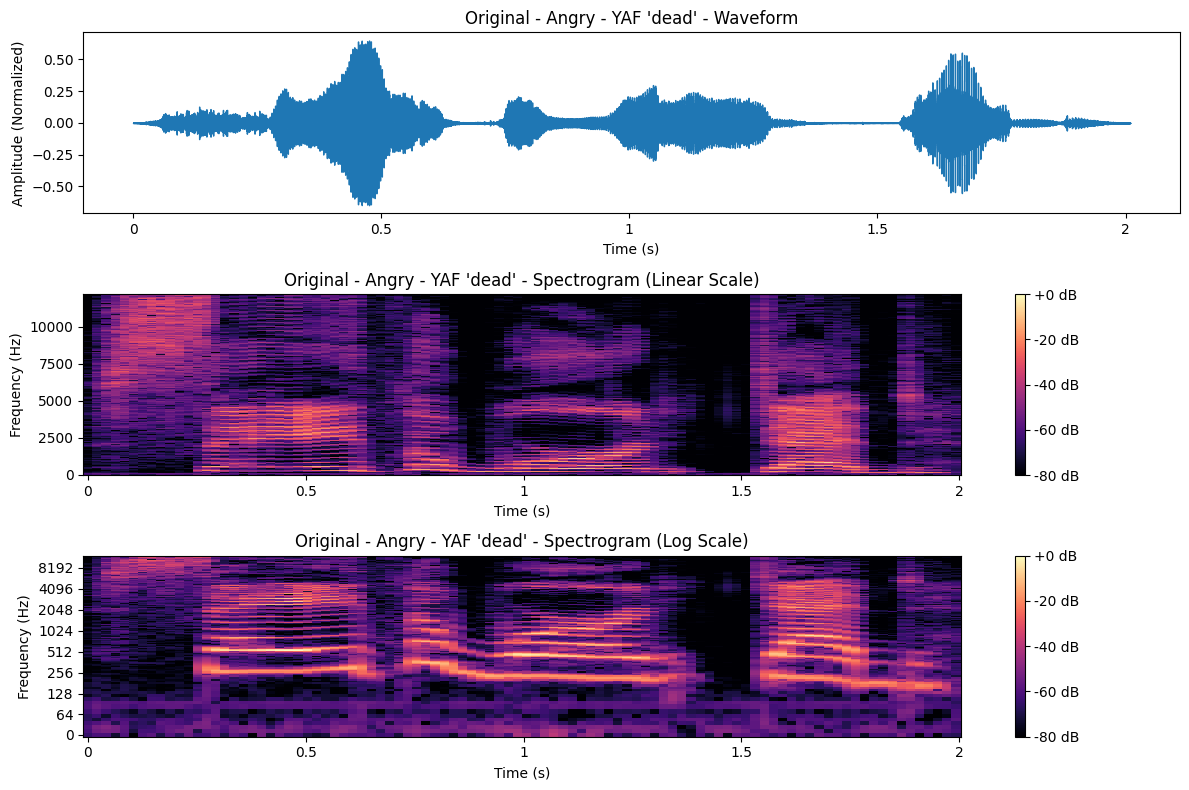

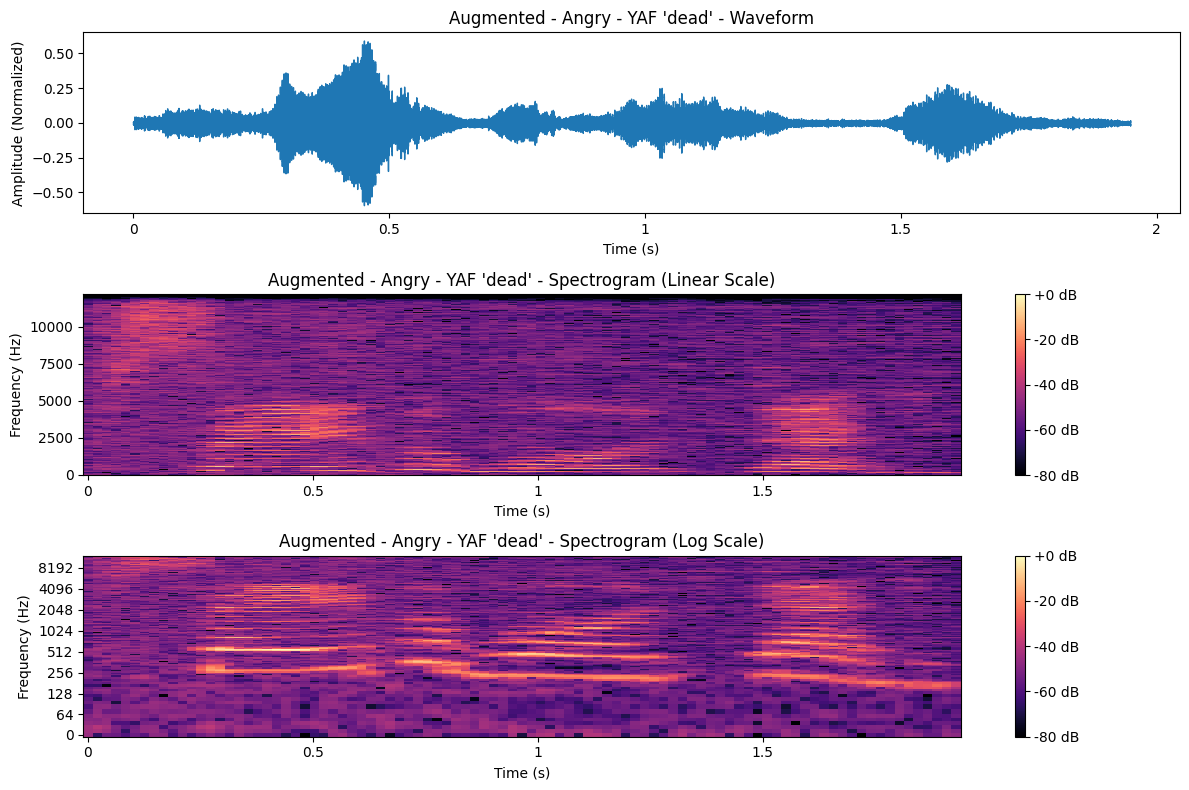

In [17]:
compare_emotion_files(original_base_path, augmented_base_path, 'angry')

#### Analysis (Angry Emotion)

* Intensity and Dynamic Range: The augmented waveform and spectrogram both exhibit increased intensity and dynamic range. This could enhance the machine learning models' ability to distinguish anger from other emotions, particularly in noisy or real-world scenarios where such distinctions might be blurred.
* Frequency Modifications: Augmentation has clearly expanded the frequency range and intensity, which might help in recognizing anger in more varied acoustic environments. However, it's crucial that these modifications do not overfit specific characteristics of the augmented data, which might not universally apply to all genuine expressions of anger.
* Temporal Characteristics: Both original and augmented audio maintain the temporal characteristics essential for expressing anger, but the augmented version might emphasize certain aspects, like abrupt starts and stops, more strongly.
* The intensity peaks are smoothed out in the augmented (as seen in the spectrogram), potentially making the model less sensitive to sudden spikes in volume or pitch, which are common in angry speech.

#### **3.2.1.2 Disgust**<a id='disgust'></a>

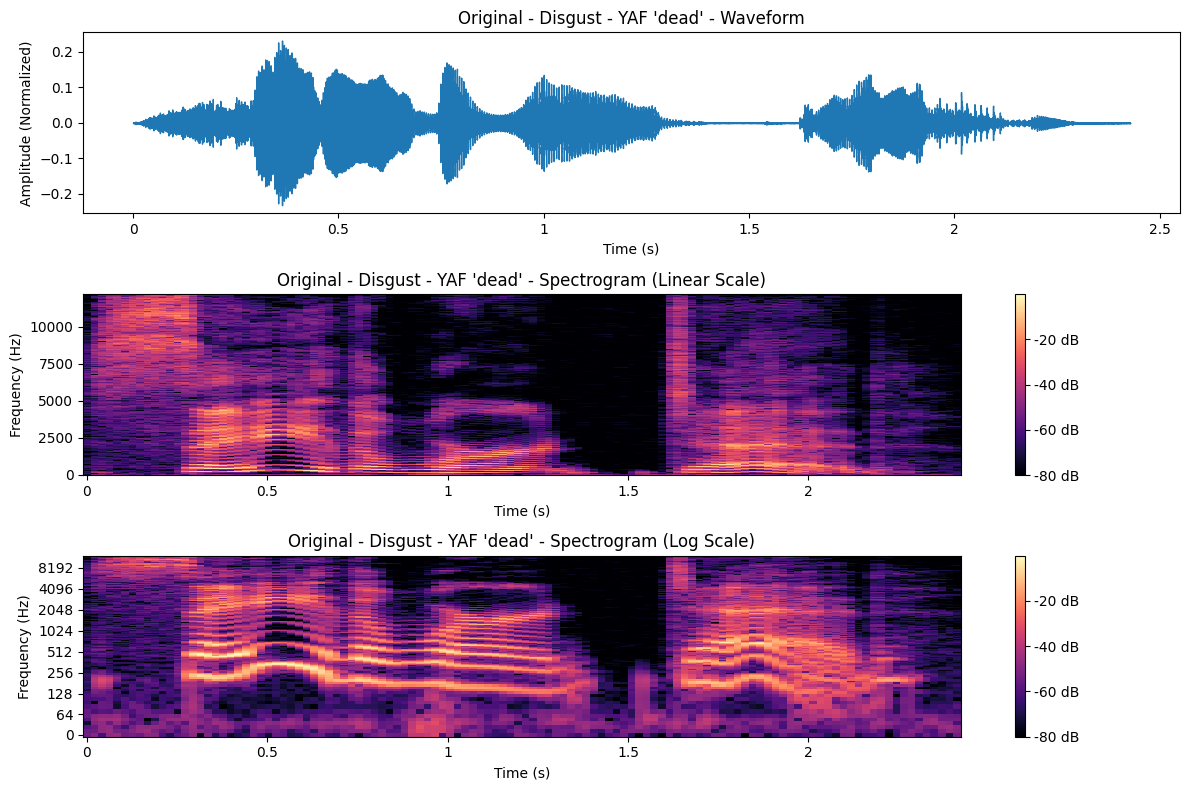

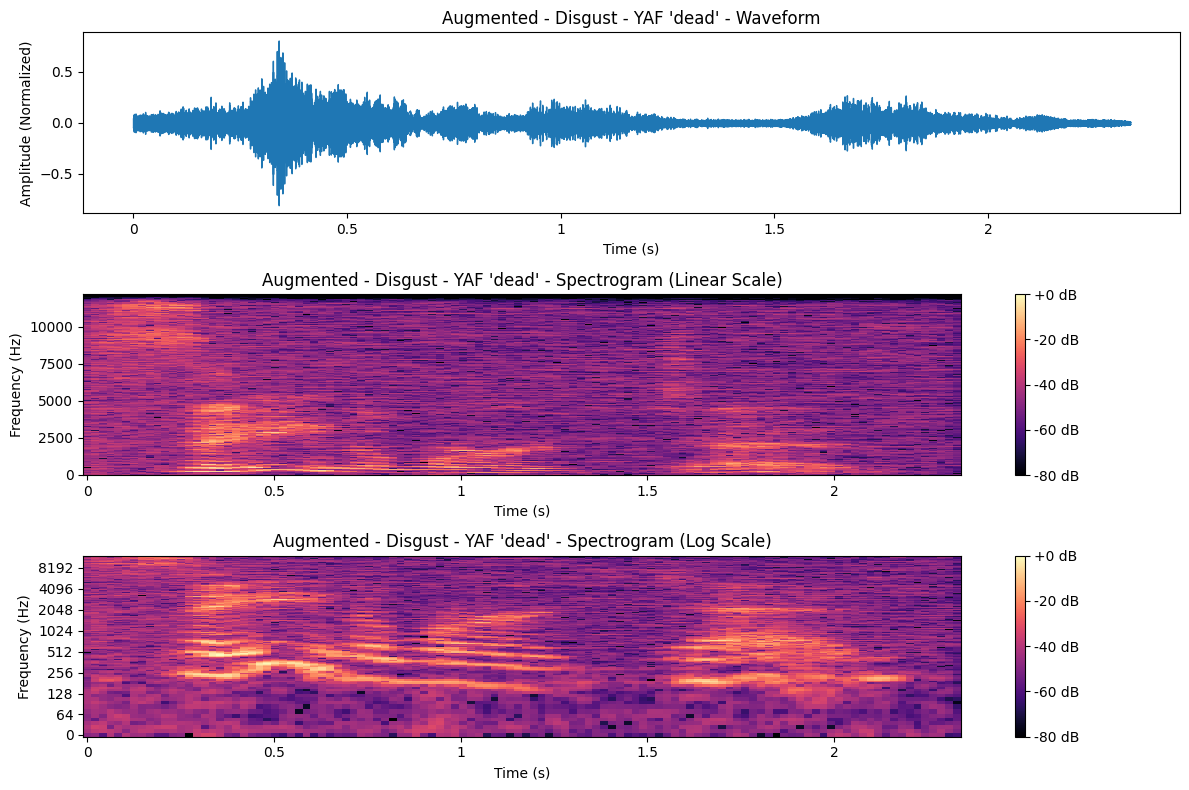

In [18]:
compare_emotion_files(original_base_path, augmented_base_path, 'disgust')

#### Analysis (Disgust Emotion)

* Dynamic Range and Intensity: The augmentation has added to the dynamic range and intensity, which could be beneficial in scenarios where emotional expressiveness needs to be distinctly recognized or analyzed, such as in emotion recognition systems.
* Frequency Enhancements: The changes in the frequency domain suggest that the augmentation process has potentially equalized or boosted certain frequency components. This could affect how disgust is perceived, emphasizing the harshness or sharpness in the voice that typically characterizes this emotion.
* Temporal Characteristics: Both the original and augmented waveforms maintain a clear display of the temporal variations inherent in the expression of disgust. However, the augmented version may exaggerate these features, which could be useful or could risk over-emphasizing certain elements that are subtler in natural speech.
* Through the augmented spectrogram, much of the erratic nature is reduced, suggesting a focus on creating a more consistent pattern that might be easier for the model to analyze.

#### **3.2.1.3 Fear**<a id='fear'></a>

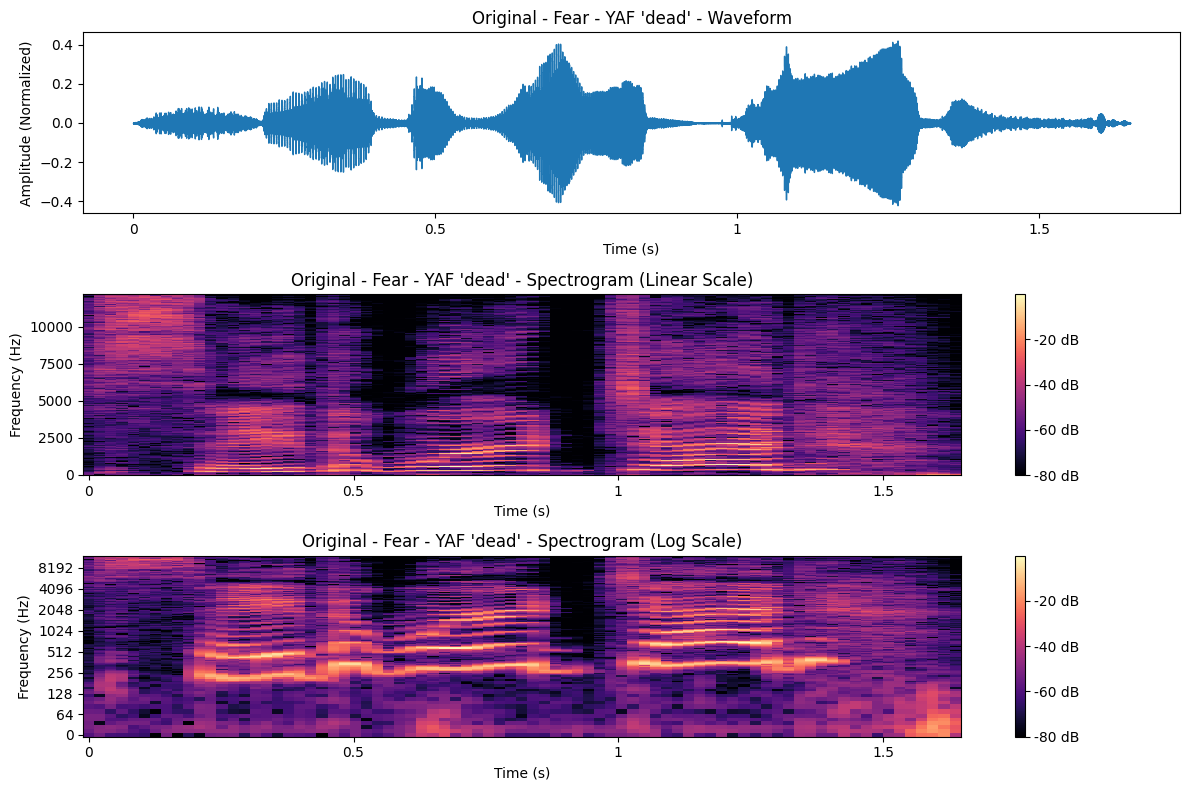

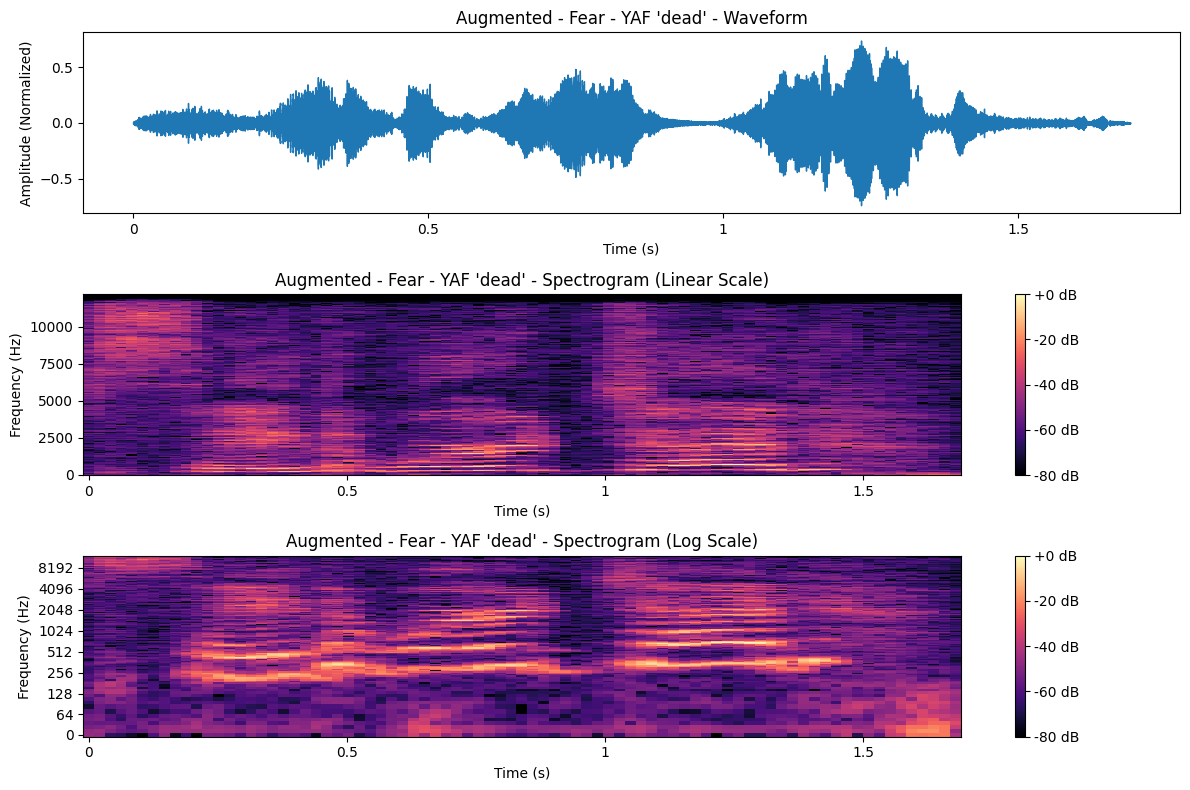

In [19]:
compare_emotion_files(original_base_path, augmented_base_path, 'fear')

#### Analysis (Fear Emotion)

* Dynamic Range and Intensity: Augmentation has clearly increased the dynamic range and intensity of the audio, which could make the emotion of fear more palpable and potentially more identifiable in automated systems.
* Frequency Enhancement: The augmentation process appears to enhance or introduce new frequency components, potentially altering the naturalness but enhancing the expressiveness of the audio. This can be particularly useful in training machine learning models for better generalization but must be managed to avoid overfitting to exaggerated features.
* Temporal Effects: Both the original and augmented audio maintain a consistent narrative over time, but the augmented audio exhibits more pronounced fluctuations, which might affect how natural the audio sounds. Time-stretching or other temporal modifications could lead to such effects.
* As seen in the spectrogram, the peaks in the augmented data are dampened, and the overall energy is more evenly spread across the spectrum, reducing the emphasis on transient features.

#### **3.2.1.4 Happy**<a id='happy'></a>

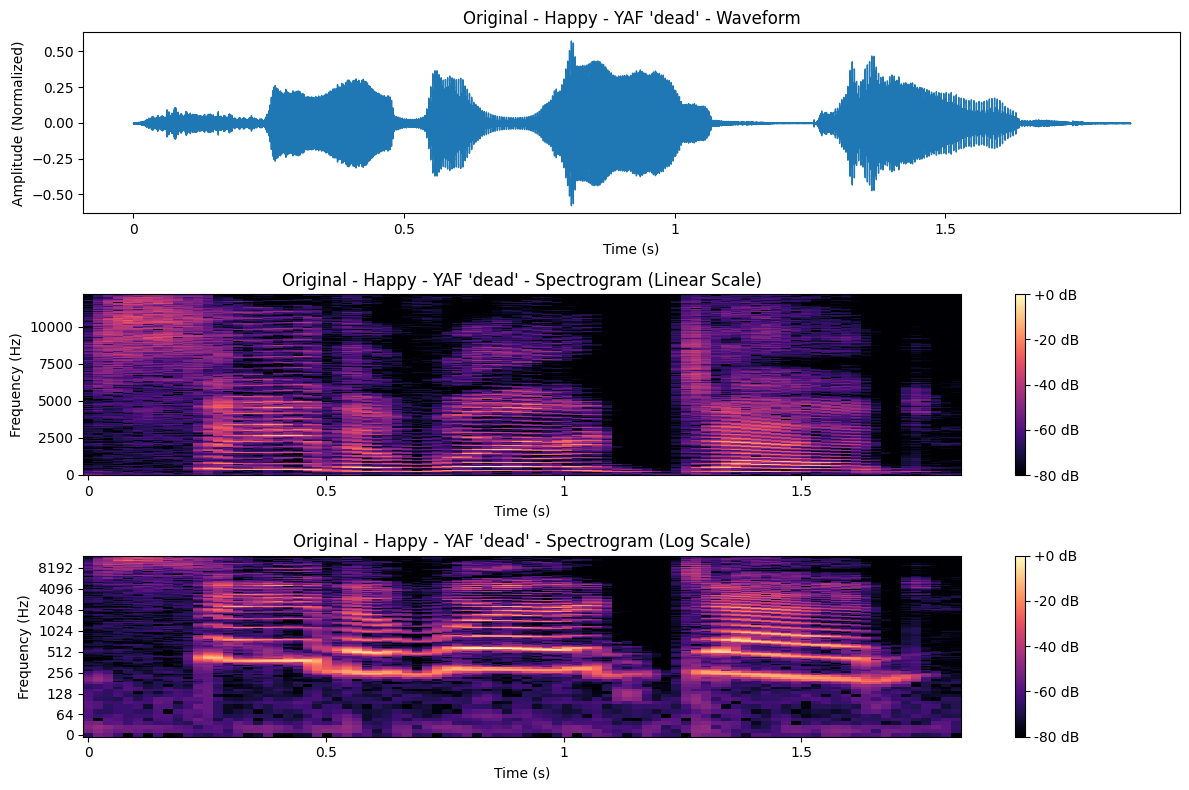

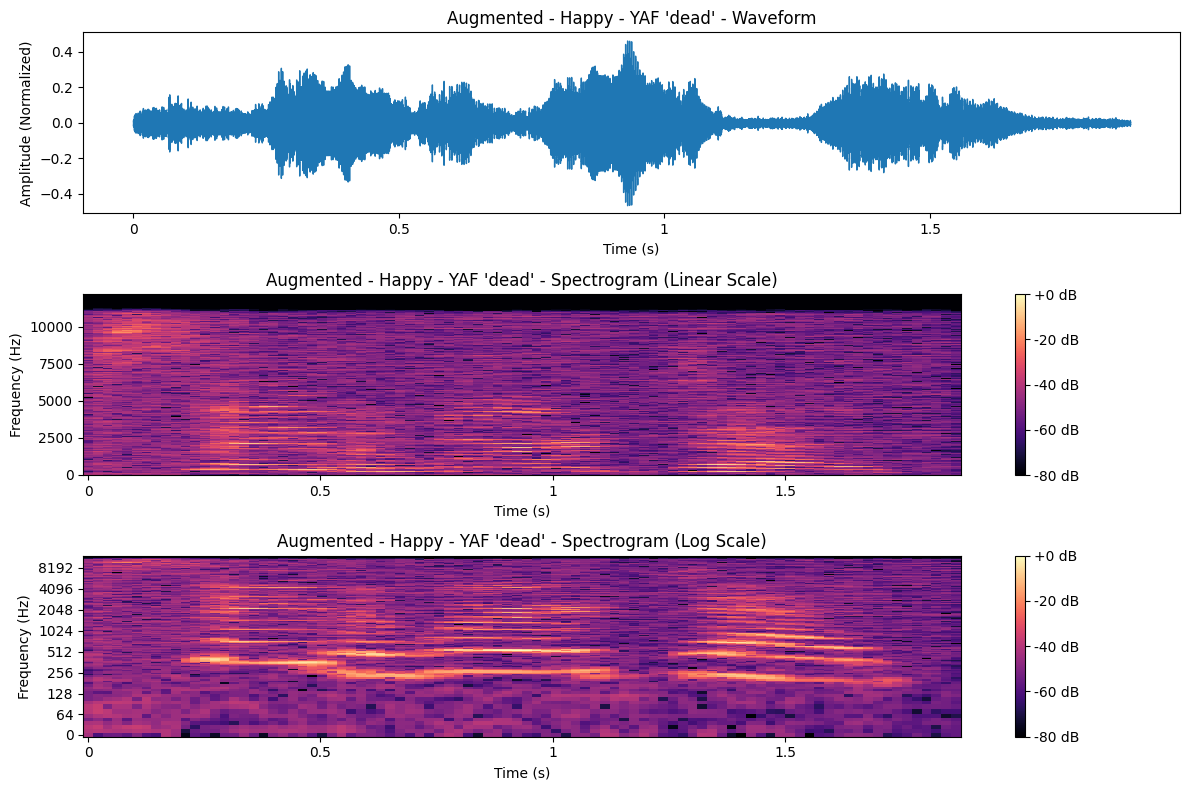

In [20]:
compare_emotion_files(original_base_path, augmented_base_path, 'happy')

#### Analysis (Happy Emotion)

* Energy and Intensity: The augmentation appears to increase the overall energy and dynamic range of the audio, which could affect the perceived intensity and emotional expression in the speech, as evident in the pronounced features across the frequency spectrum. 
* Frequency Distribution: Augmentation has altered the distribution of frequencies, potentially affecting how the emotion of happiness is conveyed. For example, increased lower frequencies might make the voice sound fuller or warmer, while changes in higher frequencies might affect the clarity or sharpness of the speech.
* Temporal Dynamics: The augmented audio shows more pronounced changes over time, which could be indicative of alterations due to time-stretching or other temporal modifications. These changes can affect the natural rhythm and flow of speech, possibly making it sound less natural or more exaggerated depending on the context of use.
* In the spectrogram, the augmentation on the rhythmic quality is maintained but with less variation between the peaks and troughs, possibly aiming to help the model focus on the melody rather than the intensity.

#### **3.2.1.5 Neutral**<a id='neutral'></a>

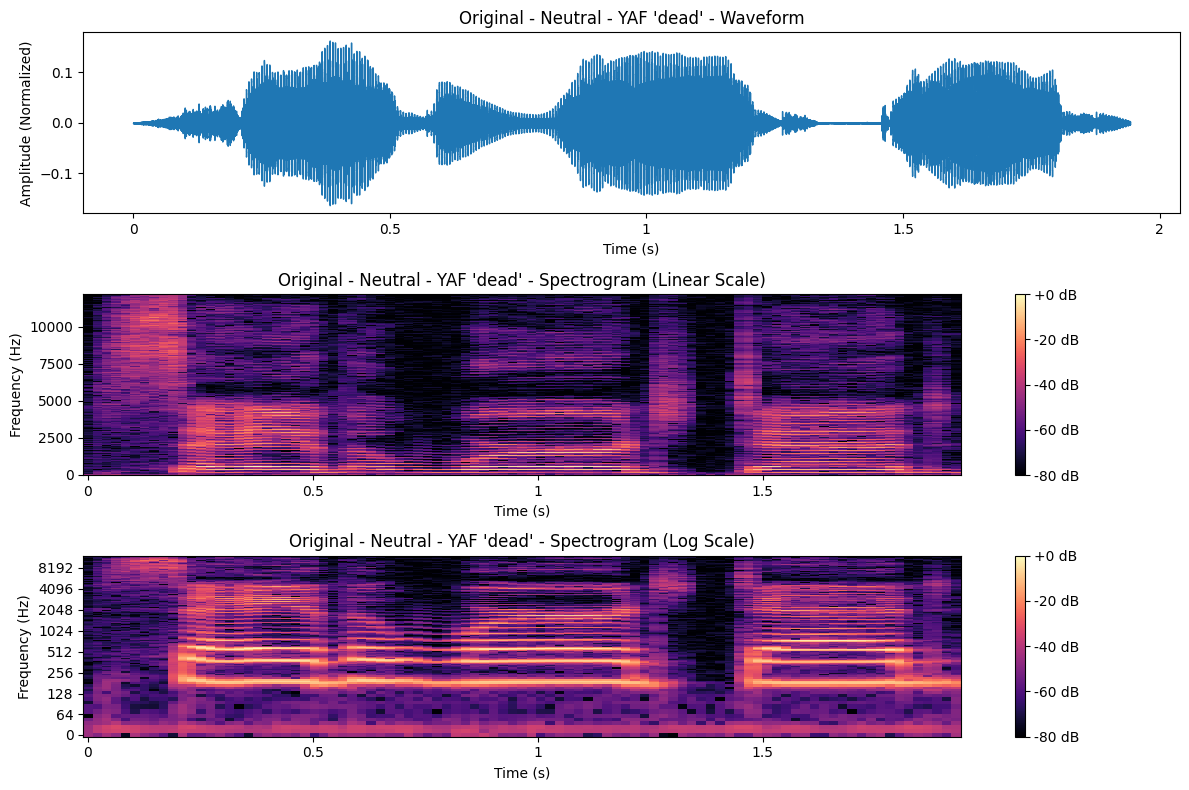

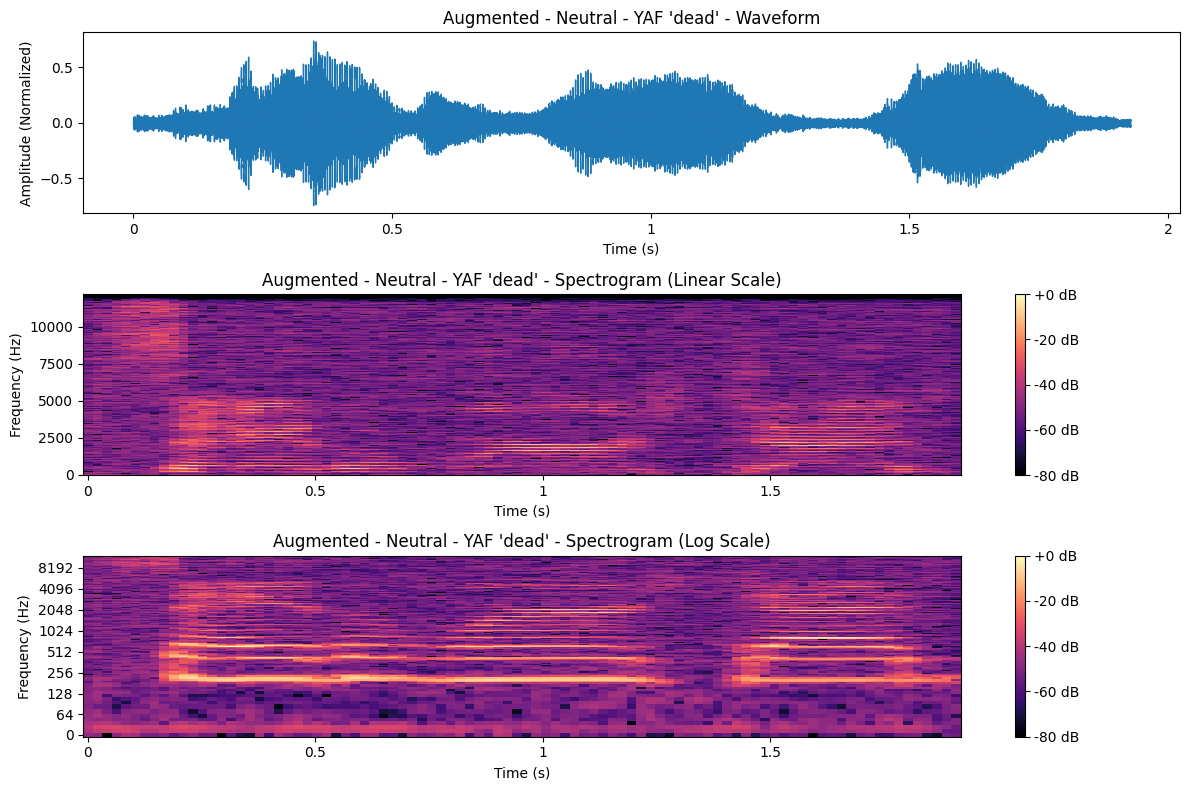

In [21]:
compare_emotion_files(original_base_path, augmented_base_path, 'neutral')

#### Analysis (Neutral Emotion)

* Dynamic Range and Intensity: The augmentation has introduced greater dynamism into the waveform, which might be beneficial for distinguishing neutral tones from background noise in practical applications. However, it's essential to ensure that these changes do not misrepresent the emotional content.
* Frequency Enhancements: The augmented audio shows a broader frequency response, especially noticeable in the higher frequencies on the spectrogram. While this can make the audio sound more vivid, it's crucial for emotion recognition systems to understand that these changes are synthetic and may not correspond to natural variations in neutral speech.
* Temporal Characteristics: Both versions maintain consistent temporal features, crucial for the accurate portrayal of neutrality in speech. The augmented version, however, seems to accentuate certain parts of the audio, which could be useful or detrimental, depending on the context of use.
* In the spectrogram, the augmented shows even less variation than the original, almost flattening the energy distribution which might help in distinguishing neutral from more emotionally charged speech.

#### **3.2.1.6 Sad**<a id='sad'></a>

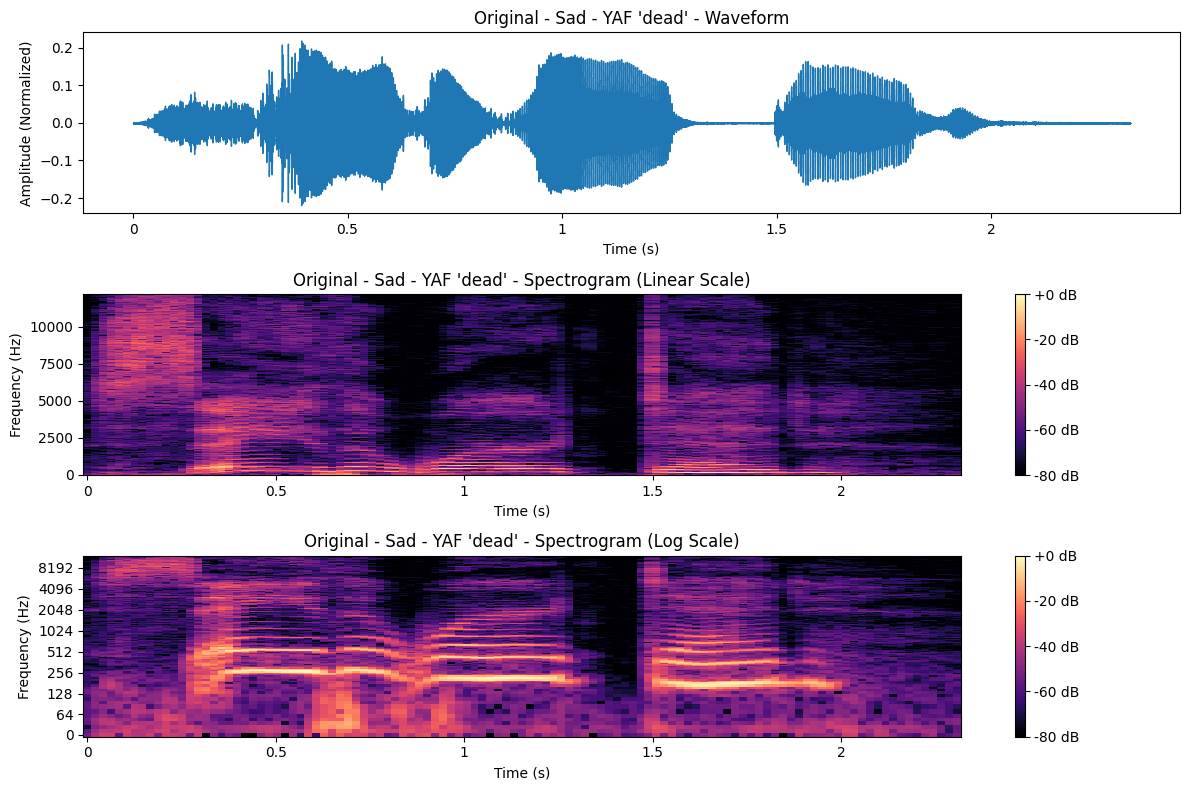

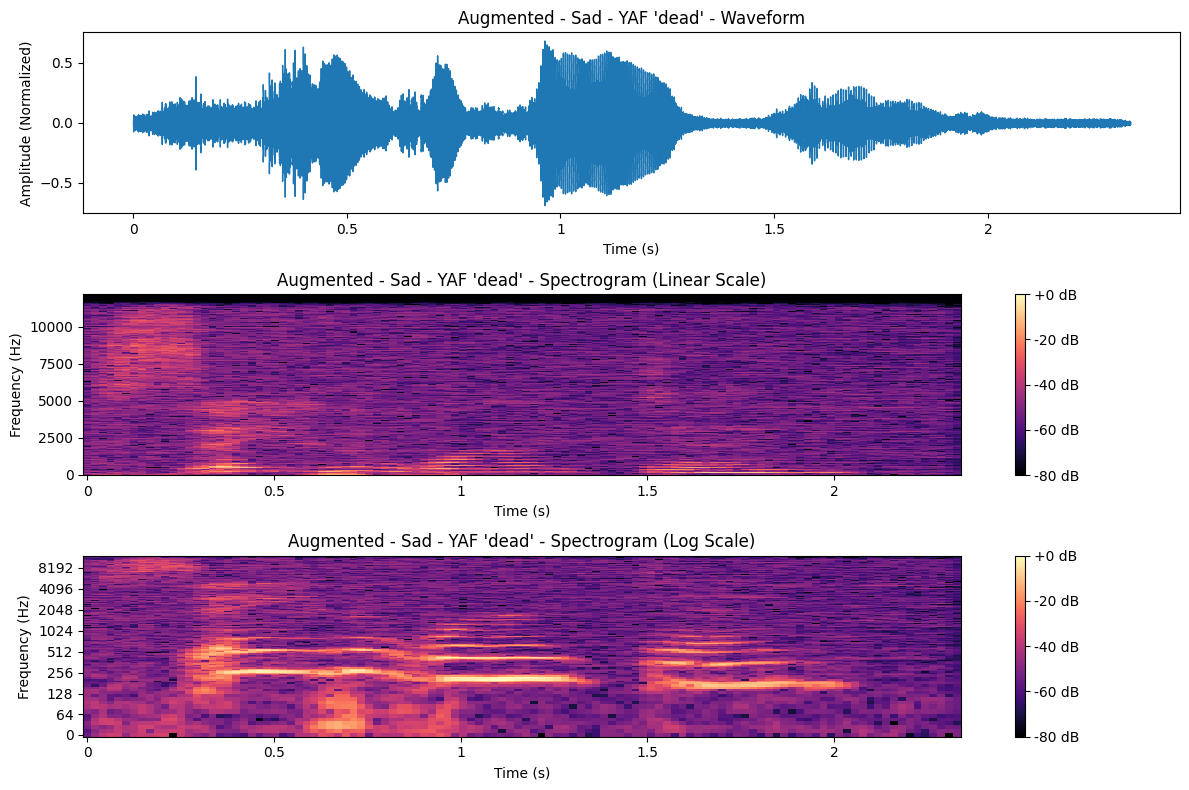

In [22]:
compare_emotion_files(original_base_path, augmented_base_path, 'sad')

#### Analysis (Sad Emotion)

* Temporal Dynamics: Both original and augmented versions show a relatively stable energy distribution over time, typical for sad expressions which tend to maintain a consistent tone. However, the augmented version shows more fluctuation, which might affect the natural flow of sadness in speech.
* Frequency Enhancements: The augmentation seems to enhance certain frequencies, which might help in certain analytical applications like emotion recognition where clearer distinctions are necessary. However, for natural emotional expression, this could detract from the authenticity of the sad emotion.
* Emotional Impact: The increased variance in the augmented waveform and spectrogram could make the sadness seem more intense or more dramatic. This could be useful in contexts where emotions need to be exaggerated for effect (e.g., in acting or synthetic voice generation), but might be less desirable when trying to preserve the naturalness of the emotion for therapeutic or communication purposes.
* Through the spectrogram, the original shows an lower overall energy and fewer fluctuations, consistent with the typically subdued and monotone nature of sadness. While the Augmented further reduces fluctuations and spreads the lower energy more evenly, potentially to standardize the subdued features of sadness.

#### Waveplot-specific

##### Similarities across all emotions:
* Normalization and Smoothing: In all augmented waveforms, there is a noticeable smoothing effect compared to the original. This is likely due to the augmentation process which may involve normalization of volume and dynamic range compression, making the waveforms appear more uniform and less spiky.
* Time Stretching/Compression: Each pair of original and augmented waveforms show some form of temporal modification - either stretching or compressing the audio data. This is evident from the altered spacing of waveform peaks and troughs, suggesting a modification in the speed or duration of spoken words, which can help in making the model robust to different speaking rates.

##### Implication for Modeling
* Training Robustness: The augmentation seems geared towards creating a dataset that trains the model to be less sensitive to over-expressions and focus on the core emotional tone, which can be crucial for improving accuracy in real-world applications where emotional expressions can be subtle or mixed.
* Potential Risks: Over-smoothing or excessive normalization might risk losing important emotional cues, especially in emotions like fear and disgust, where variability in expression is key to accurate detection.

#### Spectrogram-specific

##### Similarities across all emotions:
* Uniformity in Augmentation: In each emotion, the augmented spectrograms show a more uniform distribution of spectral energy across time and frequency. This indicates a general smoothing effect, which is typical of processes such as dynamic range compression, noise addition, or spectral normalization.
* Retention of Basic Structure: Despite the smoothing, the basic structural elements of each spectrogram remain relatively intact. This suggests that the augmentation process preserves the essential characteristics of the speech while moderating extremes in variability.

##### Implication for Modeling
* Generalization: By smoothing the spectral features, the model may generalize better across different speaking styles and emotional expressions, potentially improving its robustness and accuracy in real-world applications.
* Feature Focus: The augmentation might be designed to make the model pay more attention to sustained emotional tones rather than transient features, which could be beneficial in environments with background noise or poor audio quality.
* Emotion Recognition: The treatment of each emotion suggests a targeted approach to handle the unique challenges posed by the acoustic properties of each emotion, enhancing the model's ability to detect and classify them correctly.

#### **3.2.2 Types of Augmentation**<a id='types-of-augmentation'></a>

Our objective in this section is to show the difference through the visualisation of waveplots of the different types of augmentation.

As a control measure, we lock in 2 control variables:
* Emotion ('Angry')
* Word ('dead', verbatim: "say the word dead") - similar to above

We look at the differences at the waves plotted by the different types of augmentation:

* Noise Inection 
* Time Stretch
* Time Shift
* Pitch Shift

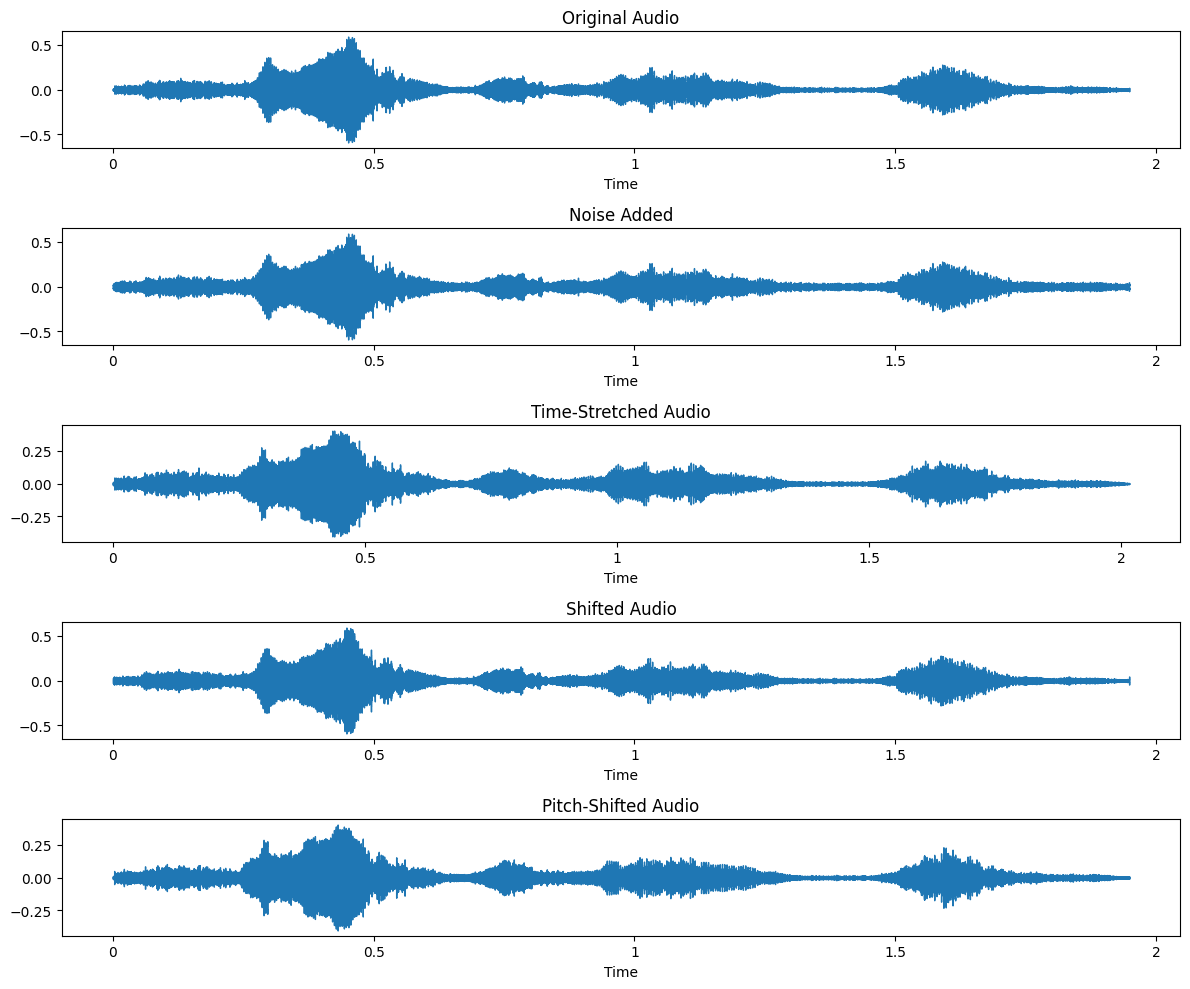

In [23]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)  # Adjusted noise amplitude
    return data + noise_amp * np.random.normal(size=data.shape[0])

def stretch(data):
    stretch_rate = np.random.uniform(low=0.95, high=1.05)  # Adjusted stretch range
    return librosa.effects.time_stretch(data, rate=stretch_rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-300, high=300))  # Adjusted shift range
    return np.roll(data, shift_range)

def pitch(data, sr):
    pitch_factor = np.random.uniform(low=-2, high=2)  # Adjusted pitch variation
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=pitch_factor)

def display_augmented_audio(tess_file_path):
    audio, sr = librosa.load(tess_file_path, sr=None)

    plt.figure(figsize=(12, 10))

    # Original Audio
    plt.subplot(5, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title('Original Audio')

    # Noise Added
    audio_noised = noise(audio)
    plt.subplot(5, 1, 2)
    librosa.display.waveshow(audio_noised, sr=sr)
    plt.title('Noise Added')

    # Time-stretched Audio
    audio_stretched = stretch(audio)
    plt.subplot(5, 1, 3)
    librosa.display.waveshow(audio_stretched, sr=sr)
    plt.title('Time-Stretched Audio')

    # Shifted Audio
    audio_shifted = shift(audio)
    plt.subplot(5, 1, 4)
    librosa.display.waveshow(audio_shifted, sr=sr)
    plt.title('Shifted Audio')

    # Pitch-shifted Audio
    audio_pitched = pitch(audio, sr)
    plt.subplot(5, 1, 5)
    librosa.display.waveshow(audio_pitched, sr=sr)
    plt.title('Pitch-Shifted Audio')

    plt.tight_layout()
    plt.show()

# Defining the file path, using 'aug_YAF_seize_angry.wav' as demonstration
tess_file_path = '../dataset/TESS_aug/YAF/YAF_angry/aug_YAF_dead_angry.wav'

# Display augmentation effects for the selected file
display_augmented_audio(tess_file_path)

#### Interpretation

These augmentations make your models more robust and generalizable by exposing them to a variety of realistic scenarios they might encounter in practical applications. For example, models trained with such varied data can better handle different noise levels, speech speeds, and vocal pitches, which are common in real-world audio processing tasks. Each type of augmentation challenges different aspects of audio processing models:

* Noise addition tests the model's ability to extract useful information amid background disturbances.
* Time stretching and shifting ensure temporal robustness.
* Pitch shifting aids in handling variations in speaker voice characteristics.

Overall, this approach is crucial for developing versatile speech and audio processing systems that perform well across diverse conditions.

### **3.3 Feature Analysis**<a id='feature-analysis'></a>

Here we look at the the first sub-feature of each feature, and compare the relationship across other feature modifications.

#### **3.3.1 Distribution Across Transformations**<a id='distribution-across-transformations'></a>

/var/folders/xf/6pcnsx5j1l71l59h1l_f56rr0000gn/T/ipykernel_46387/289759616.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


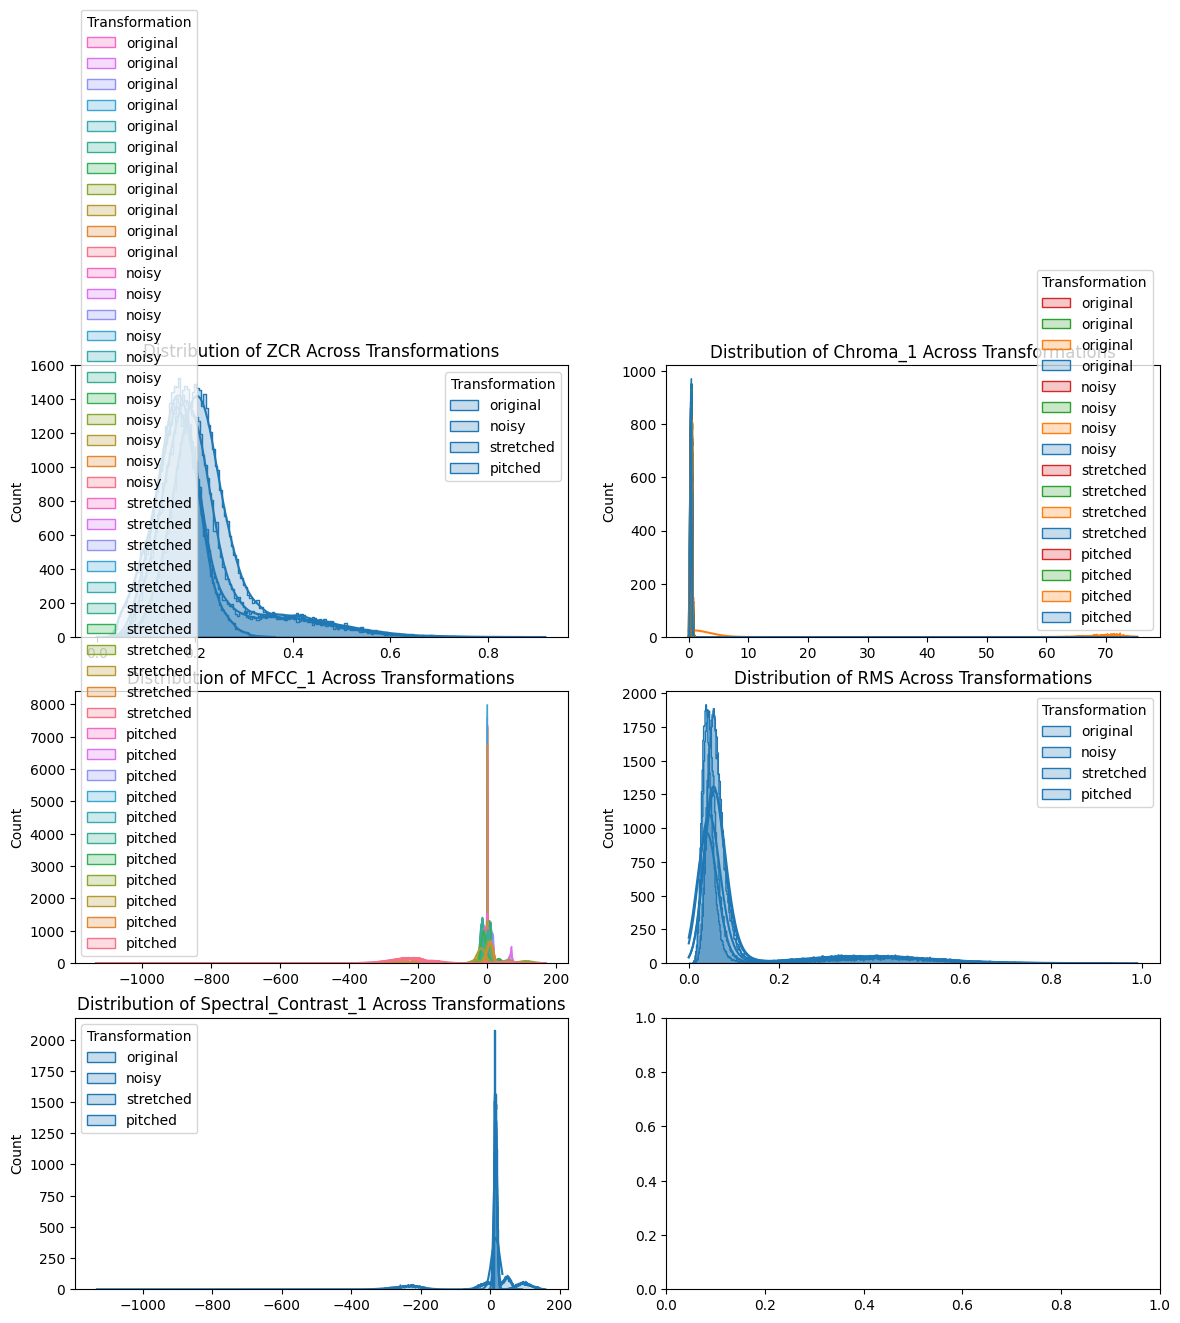

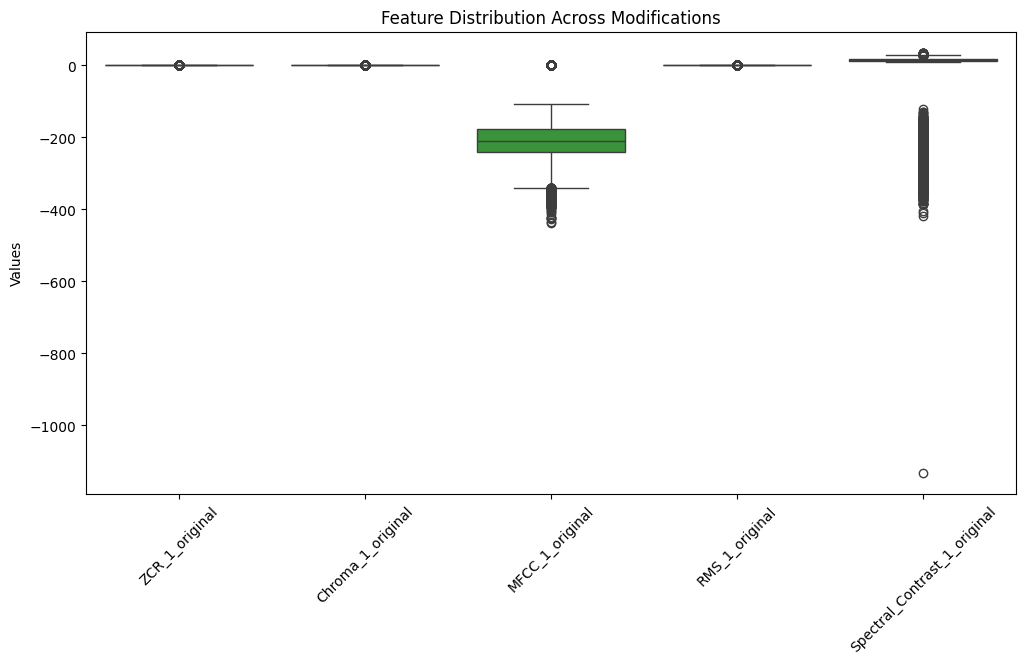

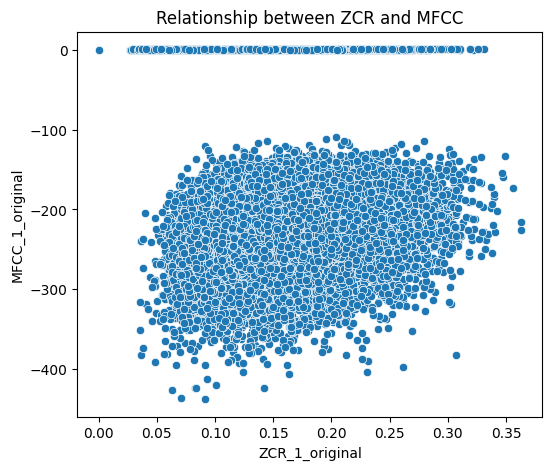

In [15]:
# Load the features DataFrame
features_df = pd.read_csv('../csv/combined_aug_features.csv')

# Histograms for feature distributions across transformations
def plot_feature_distributions(df):
    features = ['ZCR', 'Chroma_1', 'MFCC_1', 'RMS', 'Spectral_Contrast_1']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
    axes = axes.flatten()
    for ax, feature in zip(axes, features):
        for transformation in ['original', 'noisy', 'stretched', 'pitched']:
            sns.histplot(df[[col for col in df.columns if feature in col and transformation in col]], ax=ax, kde=True, element='step', label=transformation)
        ax.set_title(f'Distribution of {feature} Across Transformations')
        ax.legend(title='Transformation')
    plt.tight_layout()
    plt.show()

plot_feature_distributions(features_df)

# Boxplots for feature distribution across modifications
def plot_feature_boxplots(df):
    # Example correct names based on common outputs, replace with actual names from print
    features = ['ZCR_1_original', 'Chroma_1_original', 'MFCC_1_original', 'RMS_1_original', 'Spectral_Contrast_1_original']
    plt.figure(figsize=(12, 6))
    df_subset = df[features]
    sns.boxplot(data=df_subset)
    plt.title('Feature Distribution Across Modifications')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.show()

plot_feature_boxplots(features_df)

# Scatter plots to explore relationships between two features
def plot_feature_relationships(df):
    # Again, use the actual feature names from the DataFrame
    feature_x = 'ZCR_1_original'
    feature_y = 'MFCC_1_original'
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=feature_x, y=feature_y, data=df)
    plt.title('Relationship between ZCR and MFCC')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

plot_feature_relationships(features_df)

#### Feature Distributions Across Transformations

* Zero-Crossing Rate (ZCR): The distribution for the original samples is the most concentrated, suggesting minimal silence and consistent energy. The noisy transformation shows a slightly wider distribution, indicating variability introduced by noise, which can cause more frequent zero crossings. Stretched and pitched transformations shift slightly, affecting the temporal and pitch characteristics of the audio respectively, but not as significantly as noise does.
* Chroma: The chroma feature, which represents the intensity of different pitches, shows almost identical distributions across all transformations. This indicates that the pitch content's relative intensity is largely preserved across modifications, even when the audio is stretched or pitched.
* MFCCs (Mel-frequency cepstral coefficients): The MFCC distributions show notable differences; the original has a concentrated distribution around zero, while noisy samples have a wider spread. Pitch and stretch manipulations cause distinct shifts in MFCC values, reflecting changes in the spectral envelope due to time stretching and pitch shifting.
* Root Mean Square (RMS): This feature shows a similar trend across all transformations, with a slight widening in the noisy condition. RMS is a measure of the audio's loudness, and the augmentation seems to maintain energy levels relatively consistent.
* Spectral Contrast: Spectral contrast shows a sharp peak for original samples and maintains this characteristic across transformations. The minimal spread suggests that the contrast between the most and least energy-dense frequencies remains consistent, highlighting the effectiveness of these transformations in preserving dynamic range.

#### **3.3.1 Correlation Analysis**<a id='correlation-analysis'></a>

We look to explore correlations between different acoustical features and their relationship to the different emotional labels

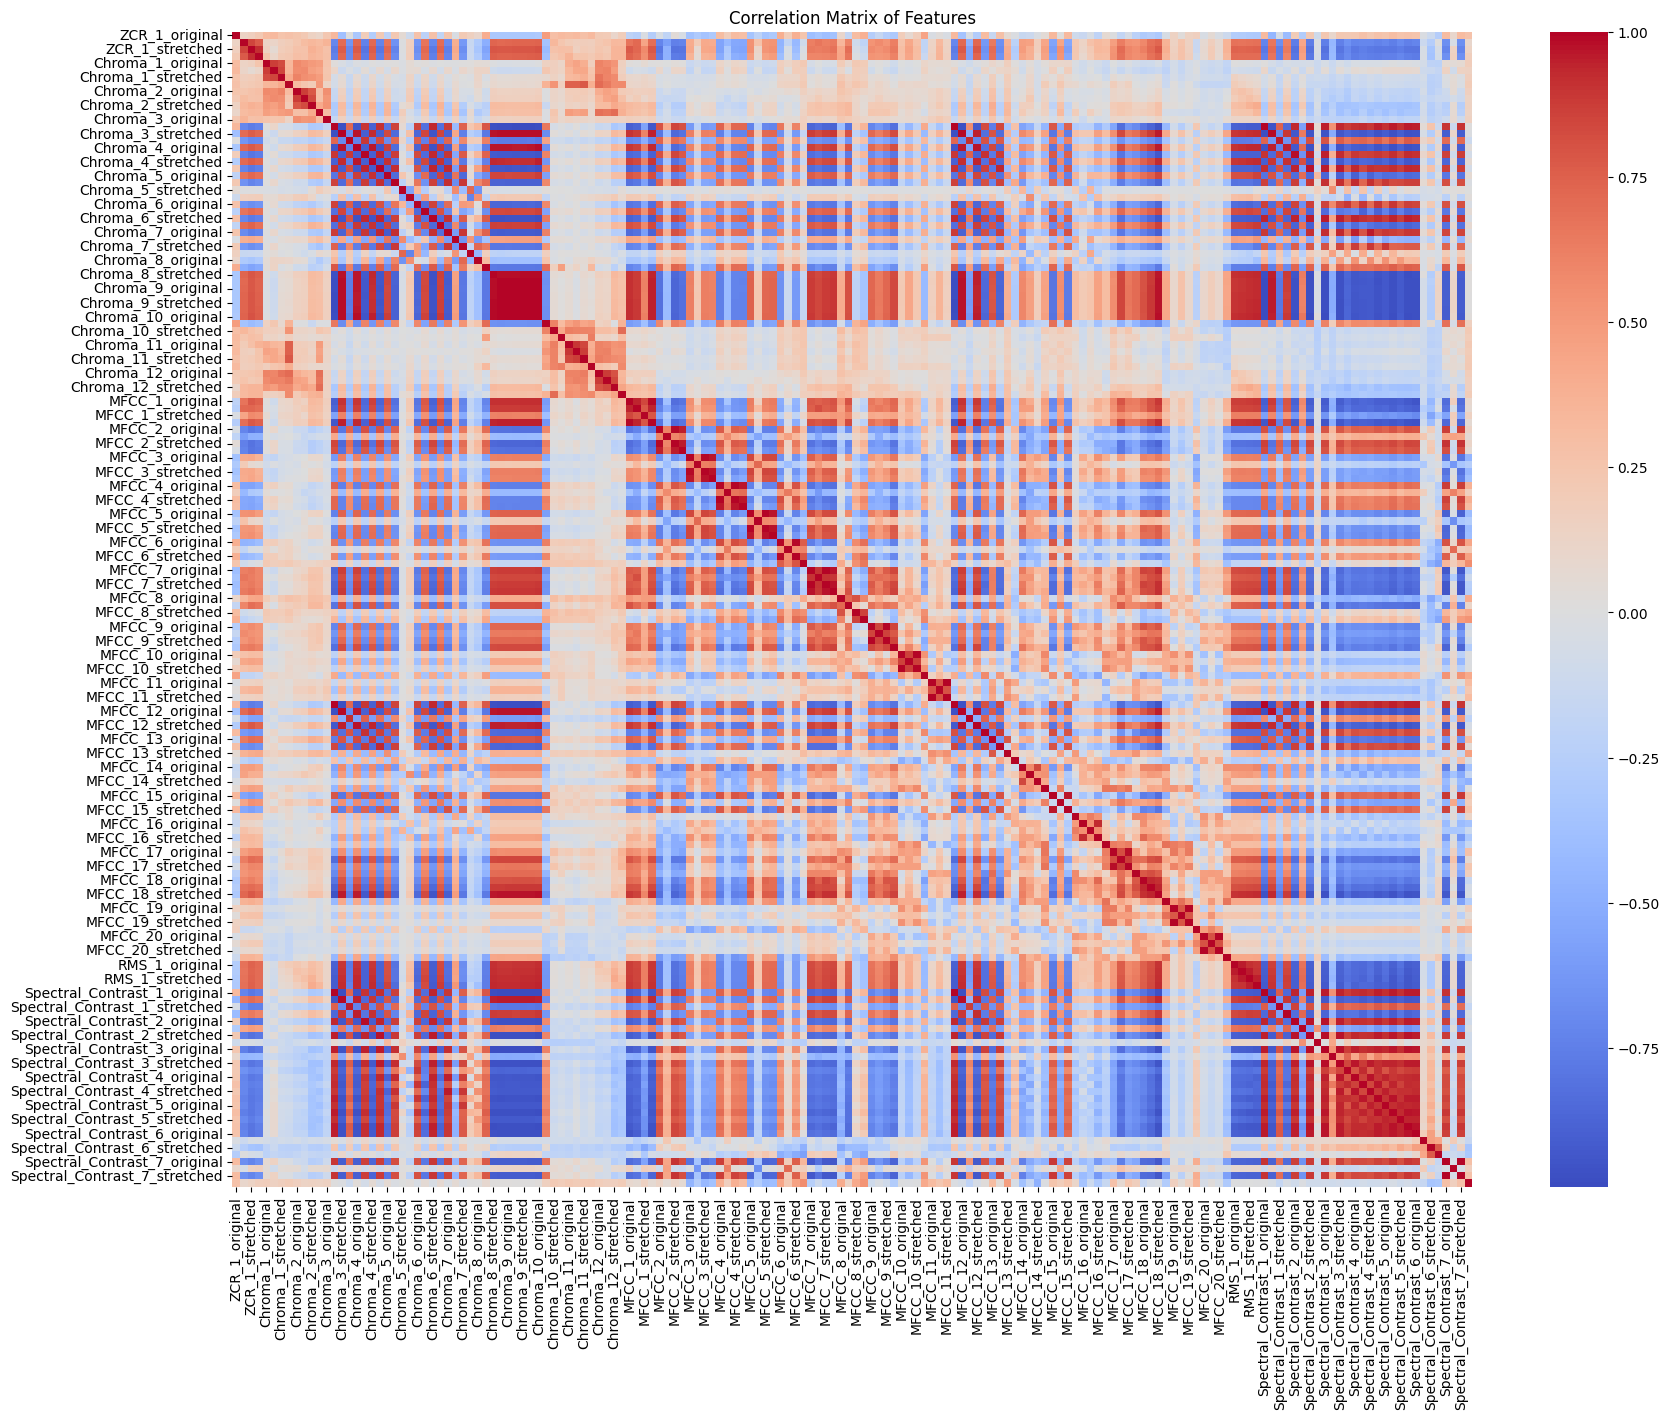

In [16]:
# Load your dataset (assuming the last column contains labels)
data = pd.read_csv('../csv/combined_aug_features.csv')

# Calculate correlations for all features
corr_matrix = data.iloc[:, :-1].corr()  # Exclude the last column if it's the label

# Plot correlation matrix
plt.figure(figsize=(20, 15))  # Adjusted size for better readability
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=90)  # Rotate the feature names for better visibility
plt.yticks(rotation=0)
plt.show()

#### Analysis

* High Intra-Group Correlation: Within each feature group (Chroma, MFCC, and Spectral Contrast), there are strong positive correlations, especially among the original features. This suggests redundancy or overlap in the information provided by features within the same group.

* Variation Between Original and Stretched Features: Correlations between original and stretched features vary widely. In some cases, such as some MFCCs, the correlation remains high, indicating that the stretching transformation preserves the feature characteristics to a large extent. However, in other cases, such as certain Chroma and Spectral Contrast features, the correlation decreases, suggesting that stretching alters these features significantly.

* Low Cross-Group Correlation: Generally, there is low correlation between different groups of features (e.g., Chroma vs. MFCC), which is expected as they capture different aspects of the audio signal.

#### Implications for Modeling

* Impact of Augmentation: The varying levels of correlation between original and stretched features indicate that augmentation (here, time stretching) impacts feature sets differently. For robust model training, it's essential to consider which features are less affected by such transformations and to understand how augmentation might impact model predictions.

* Diverse Feature Representation: The low cross-group correlation underlines the importance of using a diverse set of features in training models, as they likely contribute unique information that can help in improving the accuracy and robustness of the models.